## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [3]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [4]:
# Answer below
from sklearn.model_selection import train_test_split as tts

x = titanic.drop(columns=["Survived"])
y = titanic.Survived

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [8]:
# Answer below
def build_model(optimizer='adam', loss='binary_crossentropy', metrics=['mse']):
    model = Sequential()
    model.add(Dense(128, activation="sigmoid", input_dim=X_train.shape[1]))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

basemodel = build_model()

Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [33]:
# Answer below:
sgd = SGD(learning_rate=0.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [34]:
# Answer below:
sgdmodel = build_model(optimizer=sgd, loss="mse")
sgdmodel.fit(X_train, y_train, batch_size=100, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.2383 - val_mse: 0.2383
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2416 - mse: 0.2416 - val_loss: 0.2332 - val_mse: 0.2332
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2402 - mse: 0.2402 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2384 - mse: 0.2384 - val_loss: 0.2311 - val_mse: 0.2311
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2407 - mse: 0.2407 - val_loss: 0.2299 - val_mse: 0.2299
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2392 - mse: 0.2392 - val_loss: 0.2288 - val_mse: 0.2288
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2362 - mse: 0.2362 - val_loss: 0.2287 - val_mse: 0.2287
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2387 - mse: 0.2387 - val_loss: 

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [35]:
# Answer below:
sgdmodel.fit(X_train, y_train, batch_size=100, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
8/8 [==============================] - 0s 14ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2290 - val_mse: 0.2290
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2291 - val_mse: 0.2291
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.2281 - val_mse: 0.2281
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2290 - val_mse: 0.2290
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2297 - val_mse: 0.2297
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2296 - val_mse: 0.2296
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2296 - val_mse: 0.2296
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2384 - mse: 0.2384 - va

There is no palpable difference between the two models above.

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [36]:
# Answer below:
sgdmodel.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
4/4 [==============================] - 0s 31ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.2285 - val_mse: 0.2285
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2287 - val_mse: 0.2287
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2382 - mse: 0.2382 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.2288 - val_mse: 0.2288
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.2382 - mse: 0.23

The difference in performance is not significant.

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [37]:
# Answer below
# Answer below
def build_model_7(optimizer='adam', loss='binary_crossentropy', metrics=['mse']):
    model = Sequential()
    model.add(Dense(128, activation="sigmoid", input_dim=X_train.shape[1]))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(32, activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [38]:
# Answer below:
sgdmodel = build_model_7(optimizer=sgd)
sgdmodel.fit(X_train, y_train, batch_size=80, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 23ms/step - loss: 0.6710 - mse: 0.2387 - val_loss: 0.6473 - val_mse: 0.2274
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6642 - mse: 0.2357 - val_loss: 0.6490 - val_mse: 0.2282
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6686 - mse: 0.2378 - val_loss: 0.6511 - val_mse: 0.2292
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6729 - mse: 0.2399 - val_loss: 0.6504 - val_mse: 0.2289
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6754 - mse: 0.2411 - val_loss: 0.6493 - val_mse: 0.2283
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6825 - mse: 0.2446 - val_loss: 0.6493 - val_mse: 0.2284
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6670 - mse: 0.2370 - val_loss: 0.6506 - val_mse: 0.2290
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6645 - mse: 0.2358 - va

Define a new SGD optimizer with a learning rate of 0.001

In [39]:
# Answer below:
sgd = SGD(learning_rate=0.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [40]:
# Answer below:
sgdmodel = build_model_7(optimizer=sgd)
sgdmodel.fit(X_train, y_train, batch_size=80, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
9/9 [==============================] - 1s 24ms/step - loss: 0.6943 - mse: 0.2489 - val_loss: 0.6565 - val_mse: 0.2313
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7028 - mse: 0.2529 - val_loss: 0.6559 - val_mse: 0.2310
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6992 - mse: 0.2513 - val_loss: 0.6553 - val_mse: 0.2308
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6936 - mse: 0.2487 - val_loss: 0.6547 - val_mse: 0.2305
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.7127 - mse: 0.2577 - val_loss: 0.6542 - val_mse: 0.2303
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6744 - mse: 0.2398 - val_loss: 0.6537 - val_mse: 0.2301
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6911 - mse: 0.2477 - val_loss: 0.6532 - val_mse: 0.2299
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6822 - mse: 0.2435 - va

Having a learning rate of 0.05 is too large for this data set, thus the divergence.

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
le.fit(y_pred)
le.classes_
le.transform(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [48]:
# Answer below:
from sklearn.metrics import confusion_matrix
y_pred = sgdmodel.predict(X_test)

rounded_predictions = np.argmax(y_pred, axis=-1)
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [50]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[116   0]
 [ 62   0]]


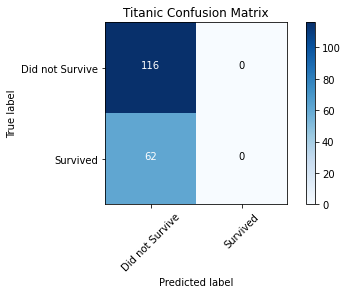

In [52]:
cm_plot_labels = ["Did not Survive", "Survived"] # for a better look at the CM
plot_confusion_matrix(cm, cm_plot_labels, title='Titanic Confusion Matrix')